In [1]:
%pip install pillow


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
from tkinter import messagebox, ttk
import tkinter as tk
from PIL import Image, ImageTk


#messagebox.showwarning("Champs requis", "Veuillez entrer votre nom et prénom.")

In [15]:
from tkinter import ttk


In [16]:
from datetime import datetime


### Test lancement d'une fenetre 

In [17]:
import tkinter as tk

# Création de la fenêtre principale
root = tk.Tk()

# Personnalisation de la fenêtre
root.title("Mon application")
root.geometry("300x200")

# Lancement de l'application
root.mainloop()


## bib et chargement de modèle 

In [18]:
import os
print(os.path.exists("/home/mohamedplays56/traffic/models/mybest_model.keras"))


False


In [19]:
import tkinter as tk
from tkinter import filedialog, messagebox, ttk
from PIL import Image, ImageTk
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import get_custom_objects
import os

# 🔹 Register LeakyReLU if used in the model
get_custom_objects().update({"LeakyReLU": LeakyReLU})

# 🔹 Load the trained model
model_path = "/home/mohamedplays56/traffic/models/my_model.keras"
mon_modèle = load_model(model_path, custom_objects={"LeakyReLU": LeakyReLU})

# 🔹 Class labels for the predictions
class TrafficSignClasses:
    def __init__(self):
        self.classes = {
            0: "Speed limit (20km/h)",
            1: "Speed limit (30km/h)",
            2: "Speed limit (50km/h)",
            3: "Speed limit (60km/h)",
            4: "Speed limit (70km/h)",
            5: "Speed limit (80km/h)",
            6: "End of speed limit (80km/h)",
            7: "Speed limit (100km/h)",
            8: "Speed limit (120km/h)",
            9: "No passing",
            10: "No passing for vehicles over 3.5 metric tons",
            11: "Right-of-way at the next intersection",
            12: "Priority road",
            13: "Yield",
            14: "Stop",
            15: "No vehicles",
            16: "Vehicles over 3.5 metric tons prohibited",
            17: "No entry",
            18: "General caution",
            19: "Dangerous curve to the left",
            20: "Dangerous curve to the right",
            21: "Double curve",
            22: "Bumpy road",
            23: "Slippery road",
            24: "Road narrows on the right",
            25: "Road work",
            26: "Traffic signals",
            27: "Pedestrians",
            28: "Children crossing",
            29: "Bicycles crossing",
            30: "Beware of ice/snow",
            31: "Wild animals crossing",
            32: "End of all speed and passing limits",
            33: "Turn right ahead",
            34: "Turn left ahead",
            35: "Ahead only",
            36: "Go straight or right",
            37: "Go straight or left",
            38: "Keep right",
            39: "Keep left",
            40: "Roundabout mandatory",
            41: "End of no passing",
            42: "End of no passing by vehicles over 3.5 metric tons"
        }
    
    def get_description(self, class_num):
        """Get the description for a given class number"""
        return self.classes.get(class_num, "Unknown class")

# Initialize TrafficSignClasses
sign_classes = TrafficSignClasses()

# 🔹 Preprocessing function
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB").resize((32, 32))  # Resize to model input size
    arr = np.array(img) / 255.0  # Normalize to [0, 1]
    return np.expand_dims(arr, axis=0)  # Add batch dimension → shape (1, 32, 32, 3)

# 🔹 Predict function
def predict(image_path):
    processed = preprocess_image(image_path)
    prediction = mon_modèle.predict(processed, verbose=0)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    return sign_classes.get_description(predicted_class), confidence

# 🔹 Tkinter GUI
class AnalyseImage(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Traffic Sign Classifier")
        self.geometry("800x800")
        self.configure(bg="#f0f0f0")
        self.tk_images = []  # To prevent garbage collection
        
        # Header
        header = tk.Label(
            self, 
            text="Traffic Sign Recognition",
            font=("Helvetica", 20, "bold"), 
            bg="#2980B9", 
            fg="white",
            pady=15
        )
        header.pack(fill="x")
        
        # Main content frame
        main_frame = tk.Frame(self, bg="#f0f0f0")
        main_frame.pack(pady=20, padx=20, fill="both", expand=True)
        
        # Image display
        self.image_frame = tk.LabelFrame(main_frame, text="Selected Image", bg="#f0f0f0")
        self.image_frame.pack(fill="both", expand=True, pady=10)
        
        self.image_label = tk.Label(self.image_frame, bg="#f0f0f0")
        self.image_label.pack(pady=10)
        
        # Results display
        self.result_frame = tk.LabelFrame(main_frame, text="Prediction Results", bg="#f0f0f0")
        self.result_frame.pack(fill="x", pady=10)
        
        self.result_label = tk.Label(
            self.result_frame,
            text="No image selected",
            font=("Helvetica", 12),
            bg="#f0f0f0",
            wraplength=600
        )
        self.result_label.pack(pady=10)
        
        # Controls
        ctrl_frame = tk.Frame(main_frame, bg="#f0f0f0")
        ctrl_frame.pack(pady=10)
        
        tk.Button(
            ctrl_frame,
            text="📁 Open Image",
            command=self.load_image,
            bg="#3498db",
            fg="white",
            font=("Helvetica", 11),
            padx=15,
            pady=5
        ).pack(side="left", padx=5)
        
        # Status bar
        self.status_bar = tk.Label(
            self,
            text="Ready",
            bd=1,
            relief="sunken",
            anchor="w",
            font=("Helvetica", 10)
        )
        self.status_bar.pack(side="bottom", fill="x")

    def load_image(self):
        filetypes = [
            ("Image files", "*.jpg *.jpeg *.png *.ppm"),
            ("All files", "*.*")
        ]
        
        file_path = filedialog.askopenfilename(filetypes=filetypes)
        if not file_path:
            return
            
        try:
            self.status_bar.config(text="Processing image...")
            self.update()
            
            # Display image
            img = Image.open(file_path).resize((400, 400))
            self.tk_images.append(ImageTk.PhotoImage(img))
            self.image_label.config(image=self.tk_images[-1])
            
            # Make prediction
            label, confidence = predict(file_path)
            
            # Display results
            result_text = f"Sign: {label}\nConfidence: {confidence*100:.1f}%"
            self.result_label.config(text=result_text)
            
            self.status_bar.config(text=f"Analysis complete - {os.path.basename(file_path)}")
            
        except Exception as e:
            messagebox.showerror("Error", f"Failed to process image:\n{str(e)}")
            self.status_bar.config(text="Error processing image")

if __name__ == "__main__":
    app = AnalyseImage()
    app.mainloop()

In [20]:
print(mon_modèle.input_shape)


(None, 32, 32, 3)


## Classe pour l'interface d'accueil

In [21]:
class Accueil(tk.Tk):  # Changed to PascalCase convention
    def __init__(self):
        super().__init__()
        self.title("Application de Diagnostic Médical")
        self.geometry("500x600")
        self.resizable(False, False)  # Disable resizing completely
        self.configure(bg="#f0f8ff")  # AliceBlue background
        
        # ========== Background Image ==========
        try:
            bg_image = Image.open("background.jpg").resize((500, 600))
            self.bg_photo = ImageTk.PhotoImage(bg_image)
            bg_label = tk.Label(self, image=self.bg_photo)
            bg_label.place(x=0, y=0, relwidth=1, relheight=1)
        except Exception as e:
            print(f"Background image error: {e}")
            self.configure(bg="#e6f2ff")  # Fallback color
        
        # ========== Main Container ==========
        main_frame = tk.Frame(self, bg="lightblue", bd=2, relief="ridge", padx=20, pady=20)
        main_frame.place(relx=0.5, rely=0.5, anchor="center")
        
        # ========== Title ==========
        title = tk.Label(
            main_frame,
            text="Bienvenue dans l'application de diagnostic",
            font=("Helvetica", 14, "bold"),
            fg="#2c3e50",  # Dark blue-gray
            bg="lightblue",
            padx=20,
            pady=10
        )
        title.pack(pady=(0, 20))
        
        # ========== Input Fields ==========
        input_frame = tk.Frame(main_frame, bg="lightblue")
        input_frame.pack(pady=10)
        
        # Name Entry
        tk.Label(
            input_frame,
            text="Nom :",
            bg="lightblue",
            font=("Helvetica", 10)
        ).grid(row=0, column=0, padx=5, pady=5, sticky="e")
        
        self.nom_entry = tk.Entry(
            input_frame,
            font=("Helvetica", 10),
            width=25
        )
        self.nom_entry.grid(row=0, column=1, padx=5, pady=5)
        
        # Surname Entry
        tk.Label(
            input_frame,
            text="Prénom :",
            bg="lightblue",
            font=("Helvetica", 10)
        ).grid(row=1, column=0, padx=5, pady=5, sticky="e")
        
        self.prenom_entry = tk.Entry(
            input_frame,
            font=("Helvetica", 10),
            width=25
        )
        self.prenom_entry.grid(row=1, column=1, padx=5, pady=5)
        
        # ========== Access Button ==========
        access_btn = tk.Button(
            main_frame,
            text="Accéder à l'analyse",
            command=self.ouvrir_analyse,
            bg="#3498db",  # Nice blue
            fg="white",
            font=("Helvetica", 10, "bold"),
            padx=15,
            pady=5,
            activebackground="#2980b9",  # Darker blue when pressed
            relief="raised"
        )
        access_btn.pack(pady=20)
        
        # Focus on first entry field
        self.nom_entry.focus_set()
        
        # Bind Enter key to trigger the button
        self.bind('<Return>', lambda event: self.ouvrir_analyse())
    
    def ouvrir_analyse(self):
        """Open analysis window after validation"""
        nom = self.nom_entry.get().strip()
        prenom = self.prenom_entry.get().strip()
        
        if not nom or not prenom:
            messagebox.showwarning(
                "Champs requis",
                "Veuillez entrer votre nom et prénom.",
                parent=self  # Keep reference to parent window
            )
            return
        
        # Save user data (optional)
        self.user_data = {"nom": nom, "prenom": prenom}
        
        self.destroy()  # Close the welcome window
        AnalyseImage(nom, prenom)  # Open the analysis window

## Classe pour L'interface d'analyse

In [22]:
class AnalyseImage(tk.Tk):
    def __init__(self, nom, prenom):
        super().__init__()
        self.title(f"Reconnaissance de panneaux - {prenom} {nom}")
        self.geometry("800x700")
        self.nom = nom
        self.prenom = prenom
        self.current_result = None
        self.tk_images = []  # Pour éviter le garbage collection

        # Style
        self.style = ttk.Style()
        self.style.configure('TLabel', font=('Helvetica', 11))
        self.style.configure('TButton', font=('Helvetica', 11), padding=5)
        self.style.configure('Header.TLabel', font=('Helvetica', 14, 'bold'))

        # Fond d'écran
        try:
            bg_image = Image.open("background.jpg").resize((800, 700))
            self.bg_photo = ImageTk.PhotoImage(bg_image)
            bg_label = ttk.Label(self, image=self.bg_photo)
            bg_label.place(x=0, y=0, relwidth=1, relheight=1)
        except:
            self.configure(bg='#f0f0f0')

        # Conteneur principal
        main_frame = ttk.Frame(self)
        main_frame.pack(pady=20, padx=20, fill='both', expand=True)

        # Info utilisateur
        ttk.Label(
            main_frame,
            text=f"👤 Utilisateur : {prenom} {nom}",
            style='Header.TLabel'
        ).pack(pady=10)

        # Contrôles image
        control_frame = ttk.Frame(main_frame)
        control_frame.pack(fill='x', pady=10)

        ttk.Button(
            control_frame,
            text="📷 Charger un panneau",
            command=self.charger_image
        ).pack(side='left', padx=5)

        ttk.Button(
            control_frame,
            text="💾 Sauvegarder",
            command=self.sauvegarder_resultat
        ).pack(side='left', padx=5)

        # Affichage image
        self.image_frame = ttk.LabelFrame(main_frame, text="Panneau chargé")
        self.image_frame.pack(fill='both', expand=True, pady=10)
        
        self.image_label = ttk.Label(self.image_frame)
        self.image_label.pack(pady=10)

        # Résultats
        self.result_frame = ttk.LabelFrame(main_frame, text="Prédiction")
        self.result_frame.pack(fill='x', pady=10)
        
        self.resultat_label = ttk.Label(
            self.result_frame,
            text="Aucune image chargée",
            font=('Helvetica', 12)
        )
        self.resultat_label.pack(pady=5)

        # Historique
        history_frame = ttk.LabelFrame(main_frame, text="Historique des analyses")
        history_frame.pack(fill='both', expand=True, pady=10)
        
        self.historique_text = tk.Text(
            history_frame,
            height=8,
            width=80,
            wrap='word'
        )
        scrollbar = ttk.Scrollbar(history_frame, command=self.historique_text.yview)
        self.historique_text.configure(yscrollcommand=scrollbar.set)
        
        scrollbar.pack(side='right', fill='y')
        self.historique_text.pack(side='left', fill='both', expand=True)

    def charger_image(self):
        filetypes = [
            ("Images", "*.jpg *.jpeg *.png *.ppm"),
            ("Tous les fichiers", "*.*")
        ]
        
        path = filedialog.askopenfilename(filetypes=filetypes)
        if not path:
            return
            
        try:
            # Chargement et affichage
            img = Image.open(path).resize((300, 300))
            self.tk_images.append(ImageTk.PhotoImage(img))  # Garde une référence
            self.image_label.configure(image=self.tk_images[-1])
            
            # Prédiction
            classe, confiance = predict(path)
            
            # Formatage du résultat
            result_text = f"Panneau: {classe}\nConfiance: {confiance*100:.1f}%"
            self.resultat_label.config(text=result_text)
            
            # Enregistrement
            self.current_result = {
                "Nom": self.nom,
                "Prénom": self.prenom,
                "Panneau": classe,
                "Confiance": f"{confiance*100:.1f}%",
                "Date": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                "Fichier": os.path.basename(path)
            }
            
            # Mise à jour historique
            hist_entry = f"{self.current_result['Date']} - {classe} ({confiance*100:.1f}%)\n"
            self.historique_text.insert('end', hist_entry)
            self.historique_text.see('end')
            
        except Exception as e:
            messagebox.showerror("Erreur", f"Impossible d'analyser l'image:\n{str(e)}")

    def sauvegarder_resultat(self):
        if not self.current_result:
            messagebox.showwarning("Avertissement", "Aucun résultat à sauvegarder")
            return
            
        try:
            fichier = "resultats_panneaux.csv"
            file_exists = os.path.isfile(fichier)
            
            with open(fichier, mode='a', newline='', encoding='utf-8') as f:
                writer = csv.DictWriter(f, fieldnames=self.current_result.keys())
                if not file_exists:
                    writer.writeheader()
                writer.writerow(self.current_result)
                
            messagebox.showinfo("Succès", f"Résultat sauvegardé dans {fichier}")
            
        except Exception as e:
            messagebox.showerror("Erreur", f"Échec de sauvegarde:\n{str(e)}")

## Lancement de l'app

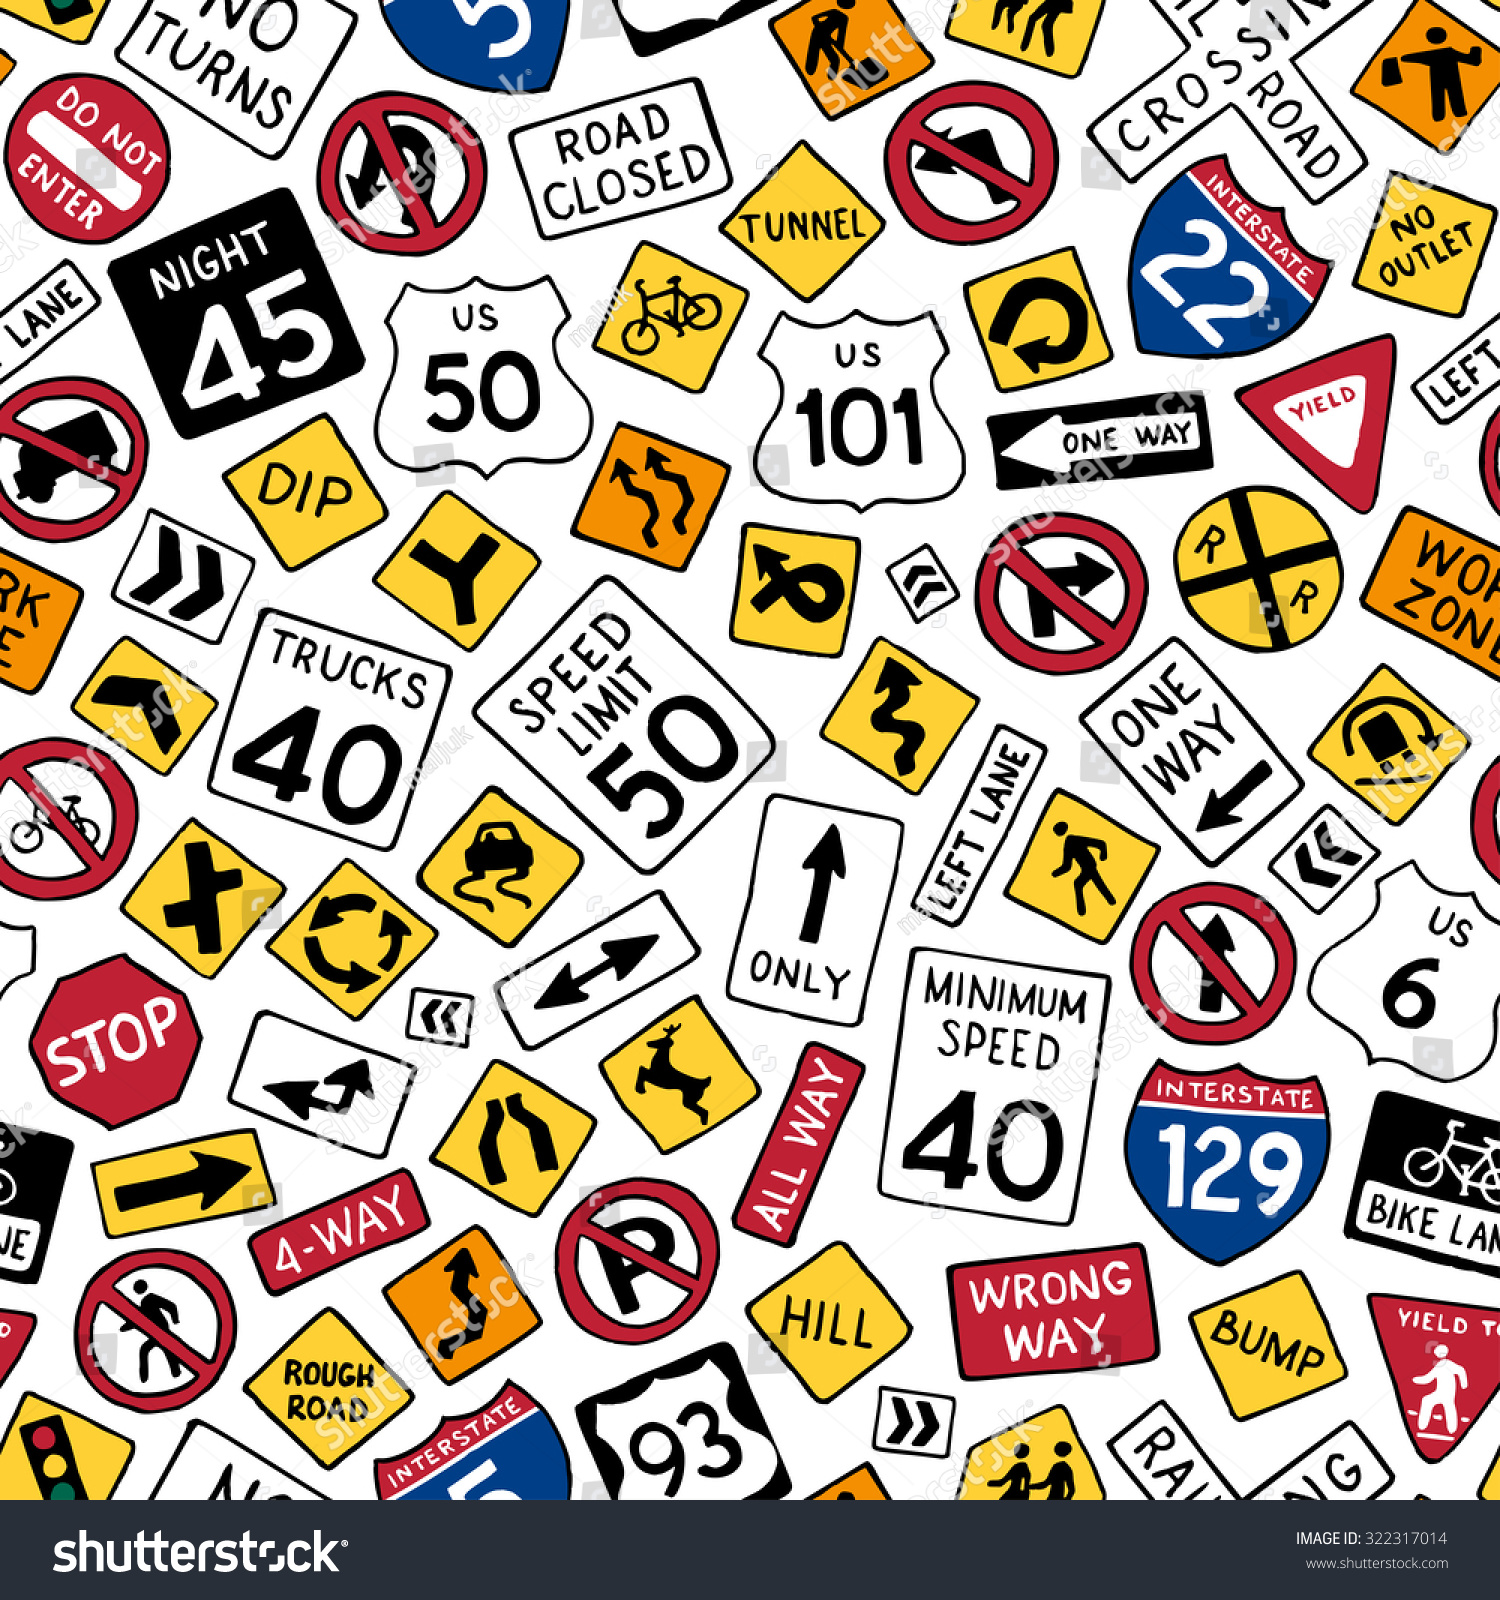

In [23]:
image_fond = Image.open("background.jpg")

image_fond

In [25]:
# Lancer l'app
if __name__ == "__main__":
    Accueil().mainloop()

In [ ]:
# # 1. Check model output shape matches CLASSES length
# print(f"Model outputs: {mon_modèle.output_shape[1]} classes")  # Should be 43
# print(f"CLASSES has: {len(CLASSES)} entries")  # Should be 43

# # 2. Verify a known image
# test_img_path = "/home/mohamedplays56/traffic/archive (9)/Train/Stop/00014_00013_00028.png"  # Use a clear stop sign image
# pred = mon_modèle.predict(preprocess_image(test_img_path))
# print(f"Predicted: {np.argmax(pred)} ({CLASSES[np.argmax(pred)]})")

Model outputs: 43 classes


NameError: name 'CLASSES' is not defined

In [47]:
print("Stop sign should be class:", CLASSES.index("Stop"))  # Should be 14
print("Predicted class 6 is:", CLASSES[6])  # Should be "End of speed limit (80km/h)"

Stop sign should be class: 14
Predicted class 6 is: End of speed limit (80km/h)


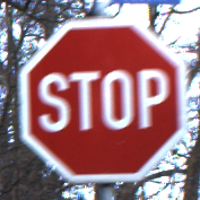

Preprocessed shape: (1, 32, 32, 3)
Pixel range: 0.07058823529411765 1.0


In [49]:
# Load and display the problematic image
stop_img = Image.open("/home/mohamedplays56/traffic/archive (9)/Train/Stop/00014_00013_00028.png")
display(stop_img.resize((200, 200)))  # Show the image

# Verify preprocessing
processed = preprocess_image("/home/mohamedplays56/traffic/archive (9)/Train/Stop/00014_00013_00028.png")
print("Preprocessed shape:", processed.shape)  # Should be (1, 32, 32, 3)
print("Pixel range:", processed.min(), processed.max())  # Should be ~0-1

In [ ]:
print("Stop sign should be class:", CLASSES.index("Stop"))  # Should be 14
print("Predicted class 6 is:", CLASSES[6])  # Should be "End of speed limit (80km/h)"

Stop sign should be class: 14
Predicted class 6 is: End of speed limit (80km/h)


## Test classe analyseImage

In [31]:
class AnalyseImage(tk.Tk):
    def __init__(self, nom, prenom):
        super().__init__()
        self.title("Analyse des images médicales ")
        self.geometry("650x600")
        self.nom = nom
        self.prenom = prenom
        self.current_result = None
        ttk.Label(self, text=f"Patient : {prenom} {nom}", font=("Helvetica", 12)).pack(pady=10)
        ttk.Button(self, text="Charger une image IRM").pack(pady=5)
        self.image_label = ttk.Label(self)
        self.image_label.pack(pady=10)
# Lancer l'app
if __name__ == "__main__":
    AnalyseImage('i','s').mainloop()